# Exercise 1 computer assignments

Fill in the parts labeled **your solution here** and replace *...* with your code. You *do not* need to strictly follow the template, but you may lose points if you do not provide the required results.

## 1 Basic definitions

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### (a)

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# we start by defining a neural network class that can use different activation functions
class NeuralNetwork(nn.Module):
    def __init__(self, activation_type='tanh'):
        super(NeuralNetwork, self).__init__()

        # Three fully connected layers with 5 neurons in each layer
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 5)

        # Set activation function based on input parameter
        if activation_type == 'tanh':
            self.activation = nn.Tanh()
        elif activation_type == 'relu':
            self.activation = nn.ReLU()
        elif activation_type == 'linear':
            self.activation = nn.Identity()  # Linear activation is just identity function
        else:
            raise ValueError(f"Activation type '{activation_type}' not supported")

    def forward(self, x):
        # Apply layers with the specified activation function
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)  # No activation on the final layer as per assignment
        return x

# Create the three neural networks with different activation functions
nn_tanh = NeuralNetwork('tanh')
nn_relu = NeuralNetwork('relu')
nn_linear = NeuralNetwork('linear')

# Print the model architectures to verify
print("Neural Network with tanh activation:")
print(nn_tanh)
print("\nNeural Network with ReLU activation:")
print(nn_relu)
print("\nNeural Network with linear activation:")
print(nn_linear)

Neural Network with tanh activation:
NeuralNetwork(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (activation): Tanh()
)

Neural Network with ReLU activation:
NeuralNetwork(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (activation): ReLU()
)

Neural Network with linear activation:
NeuralNetwork(
  (fc1): Linear(in_features=5, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=5, bias=True)
  (activation): Identity()
)


#### (b)

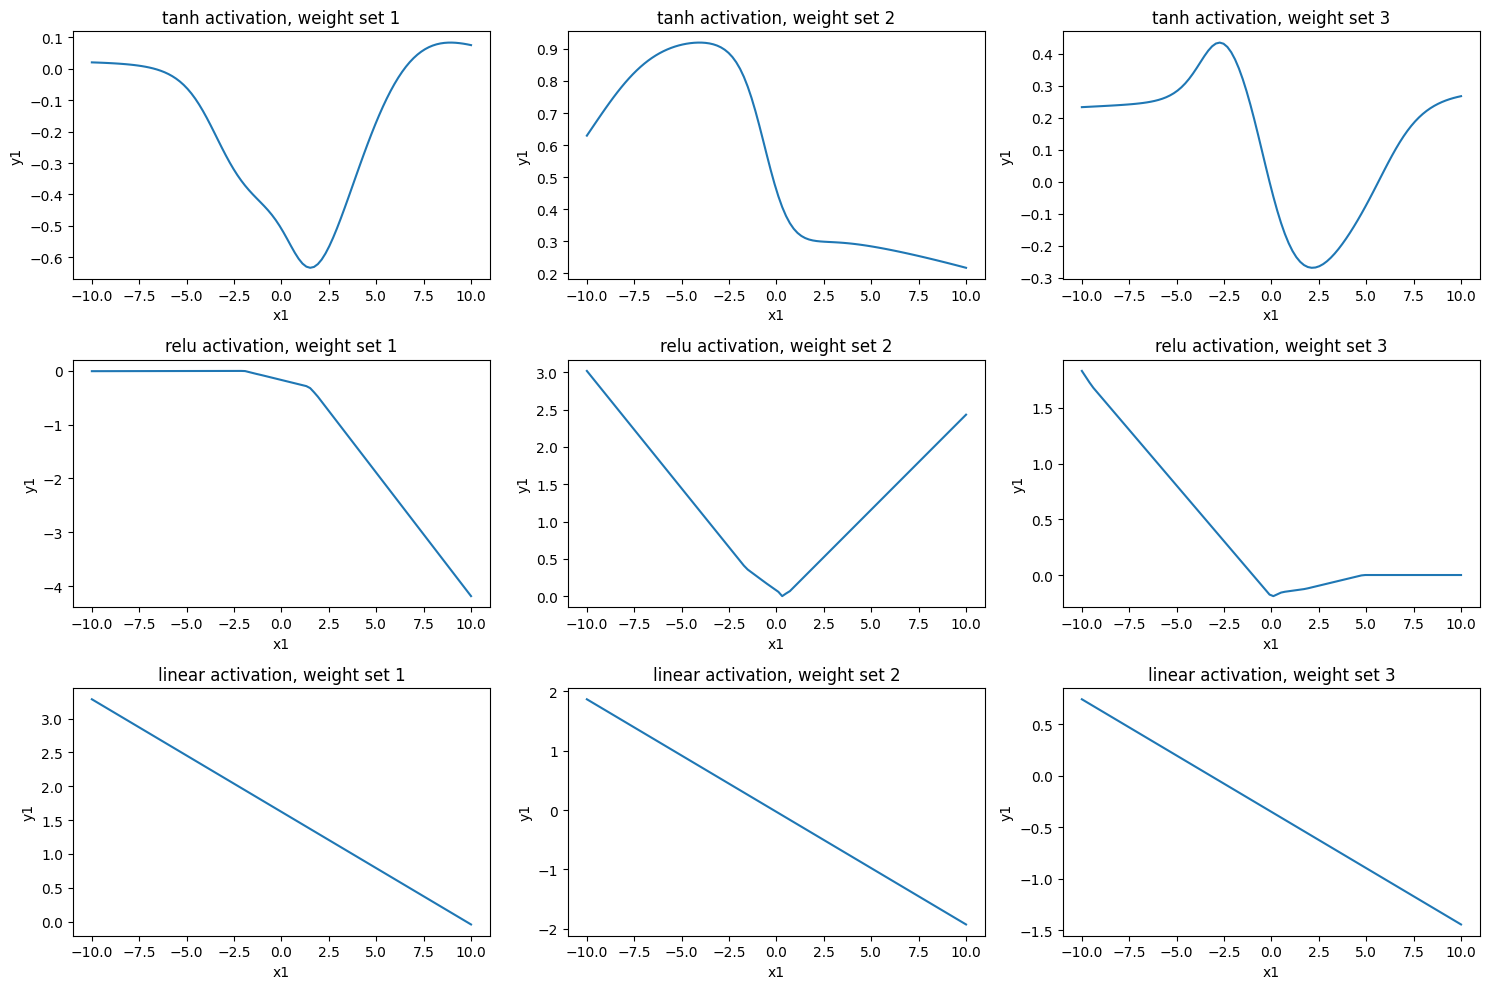

In [ ]:
# Generate three sets of random weights for each network
def init_random_weights(model):
    # Initialize with random weights
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            nn.init.zeros_(m.bias)
    return model

# Create copies of networks with different random initializations
models = {
    'tanh': [init_random_weights(NeuralNetwork('tanh')) for _ in range(3)],
    'relu': [init_random_weights(NeuralNetwork('relu')) for _ in range(3)],
    'linear': [init_random_weights(NeuralNetwork('linear')) for _ in range(3)]
}

# Create input data - x1 varies from -10.0 to 10.0, other dimensions are random
x1_values = torch.linspace(-10.0, 10.0, 100)
x_fixed = torch.randn(4)  # Random values for x2, x3, x4, x5

# Prepare to collect outputs
activation_types = ['tanh', 'relu', 'linear']
all_y1_values = {}

# Collect output y1 for each model
for act_type in activation_types:
    all_y1_values[act_type] = []
    for model_idx in range(3):
        model = models[act_type][model_idx]
        y1_values = []

        # For each x1 value, create full input and get y1 output
        for x1 in x1_values:
            x_full = torch.cat([x1.reshape(1), x_fixed]).reshape(1, 5)
            with torch.no_grad():
                output = model(x_full)
                y1 = output[0, 0].item()  # Get the first element of output
                y1_values.append(y1)

        all_y1_values[act_type].append(y1_values)

# Code for reporting the 9 plots:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3): # loop over rows of plot (activation types)
    act_type = activation_types[i]
    for j in range(3): # loop over cols of plot (weight sets)
        y1_values = all_y1_values[act_type][j]
        axs[i, j].plot(x1_values.numpy(), y1_values)
        axs[i, j].set_title(f'{act_type} activation, weight set {j+1}')
        axs[i, j].set_xlabel('x1')
        axs[i, j].set_ylabel('y1')
plt.tight_layout()
plt.show()

## 2 Optimization

### 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a)

In [ ]:
# Define the function f(w) as given in the problem
def f(w):
    """Function f(w) as defined in equation (6) of the assignment

    Args:
        w: Input vector of shape (2,)

    Returns:
        The function value f(w)
    """
    term1 = np.exp(-w[0]**2 - 2*(w[1] - 1)**2)
    term2 = np.exp(-(w[0] - 1)**2 - 2*w[1]**2)
    return term1 + term2

# Define the gradient of f(w)
def grad_f(w):
    """Gradient of the function f(w)

    Args:
        w: Input vector of shape (2,)

    Returns:
        Gradient of f(w), shape (2,)
    """
    # Gradient components for the first term
    term1 = np.exp(-w[0]**2 - 2*(w[1] - 1)**2)
    grad_term1_w1 = -2*w[0] * term1
    grad_term1_w2 = -4*(w[1] - 1) * term1

    # Gradient components for the second term
    term2 = np.exp(-(w[0] - 1)**2 - 2*w[1]**2)
    grad_term2_w1 = -2*(w[0] - 1) * term2
    grad_term2_w2 = -4*w[1] * term2

    # Sum the gradients
    grad_w1 = grad_term1_w1 + grad_term2_w1
    grad_w2 = grad_term1_w2 + grad_term2_w2

    return np.array([grad_w1, grad_w2])

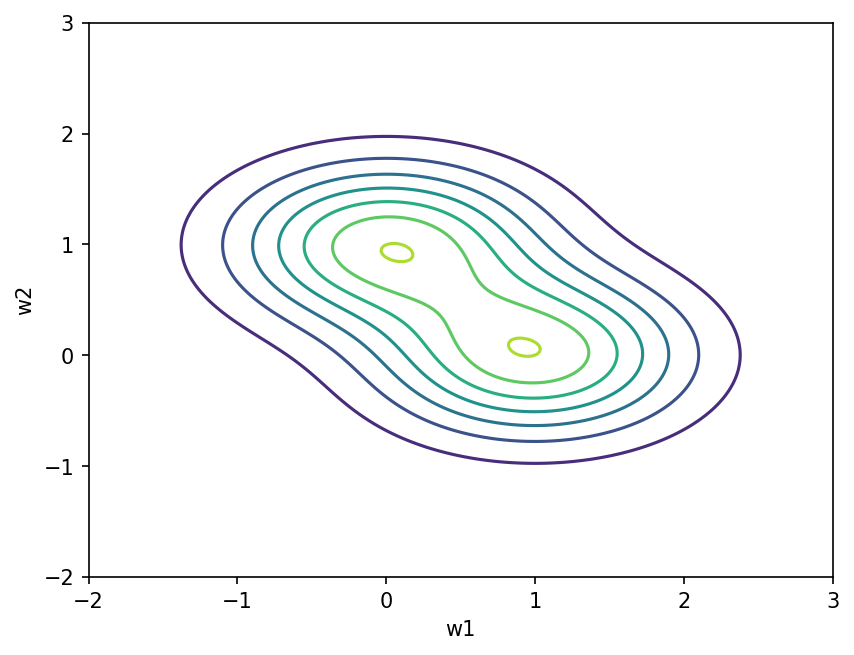

In [ ]:
# Code for plotting isocontours of the function f
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150)
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### (b)

**The gradient of the function f(w) = exp(-w₁² - 2(w₂ - 1)²) + exp(-(w₁ - 1)² - 2w₂²) is calculated as follows:**

For the first term, f₁(w) = exp(-w₁² - 2(w₂ - 1)²):

∂f₁/∂w₁ = ∂/∂w₁[exp(-w₁² - 2(w₂ - 1)²)] = -2w₁ · exp(-w₁² - 2(w₂ - 1)²)

∂f₁/∂w₂ = ∂/∂w₂[exp(-w₁² - 2(w₂ - 1)²)] = -4(w₂ - 1) · exp(-w₁² - 2(w₂ - 1)²)

For the second term, f₂(w) = exp(-(w₁ - 1)² - 2w₂²):

∂f₂/∂w₁ = ∂/∂w₁[exp(-(w₁ - 1)² - 2w₂²)] = -2(w₁ - 1) · exp(-(w₁ - 1)² - 2w₂²)

∂f₂/∂w₂ = ∂/∂w₂[exp(-(w₁ - 1)² - 2w₂²)] = -4w₂ · exp(-(w₁ - 1)² - 2w₂²)

The complete gradient of f(w) is:

∇f(w) = [∂f₁/∂w₁ + ∂f₂/∂w₁, ∂f₁/∂w₂ + ∂f₂/∂w₂]

= [-2w₁ · exp(-w₁² - 2(w₂ - 1)²) - 2(w₁ - 1) · exp(-(w₁ - 1)² - 2w₂²),
   -4(w₂ - 1) · exp(-w₁² - 2(w₂ - 1)²) - 4w₂ · exp(-(w₁ - 1)² - 2w₂²)]

This is what I implemented in the `grad_f` function above.

#### (c)

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

# Implement gradient ascent (since we want to maximize)
def gradient_ascent(start_point, learning_rate, max_iterations=1000, tolerance=1e-4):
    """
    Performs gradient ascent to maximize f(w)

    Args:
        start_point: Initial point, shape (2,)
        learning_rate: Step size for gradient ascent
        max_iterations: Maximum number of iterations
        tolerance: Stopping criterion based on gradient norm

    Returns:
        tuple: (final_point, trajectory, function_values)
    """
    w = start_point.copy()
    trajectory = [w.copy()]
    function_values = [f(w)]

    for i in range(max_iterations):
        # Compute gradient
        gradient = grad_f(w)

        # Check stopping criterion
        if np.linalg.norm(gradient) < tolerance:
            break

        # Update weights (ascent, so we add the gradient)
        w = w + learning_rate * gradient

        # Store trajectory and function value
        trajectory.append(w.copy())
        function_values.append(f(w))

    return w, np.array(trajectory), np.array(function_values)

# Try different learning rates for each starting point to find optimal ones
learning_rates = [0.05, 0.1, 0.2]
best_results = []

for i, start_point in enumerate([w1, w2, w3]):
    best_f_val = -np.inf
    best_result = None

    # Try different learning rates
    for lr in learning_rates:
        final_w, trajectory, f_values = gradient_ascent(start_point, lr)
        if f_values[-1] > best_f_val:
            best_f_val = f_values[-1]
            best_result = (final_w, trajectory, f_values, lr)

    best_results.append(best_result)
    print(f"Starting point {i+1}: {start_point}")
    print(f"  Best learning rate: {best_result[3]}")
    print(f"  Final point: {best_result[0]}")
    print(f"  Final function value: {best_result[2][-1]}")
    print(f"  Number of iterations: {len(best_result[2])}")

Starting point 1: [0.2 0.5]
  Best learning rate: 0.2
  Final point: [0.07076065 0.9292647 ]
  Final function value: 1.0600767890539444
  Number of iterations: 27
Starting point 2: [0.5 0.2]
  Best learning rate: 0.2
  Final point: [0.92922728 0.07073981]
  Final function value: 1.060076788009395
  Number of iterations: 26
Starting point 3: [1. 1.]
  Best learning rate: 0.2
  Final point: [0.07076421 0.92926337]
  Final function value: 1.0600767887739608
  Number of iterations: 32


#### (d)

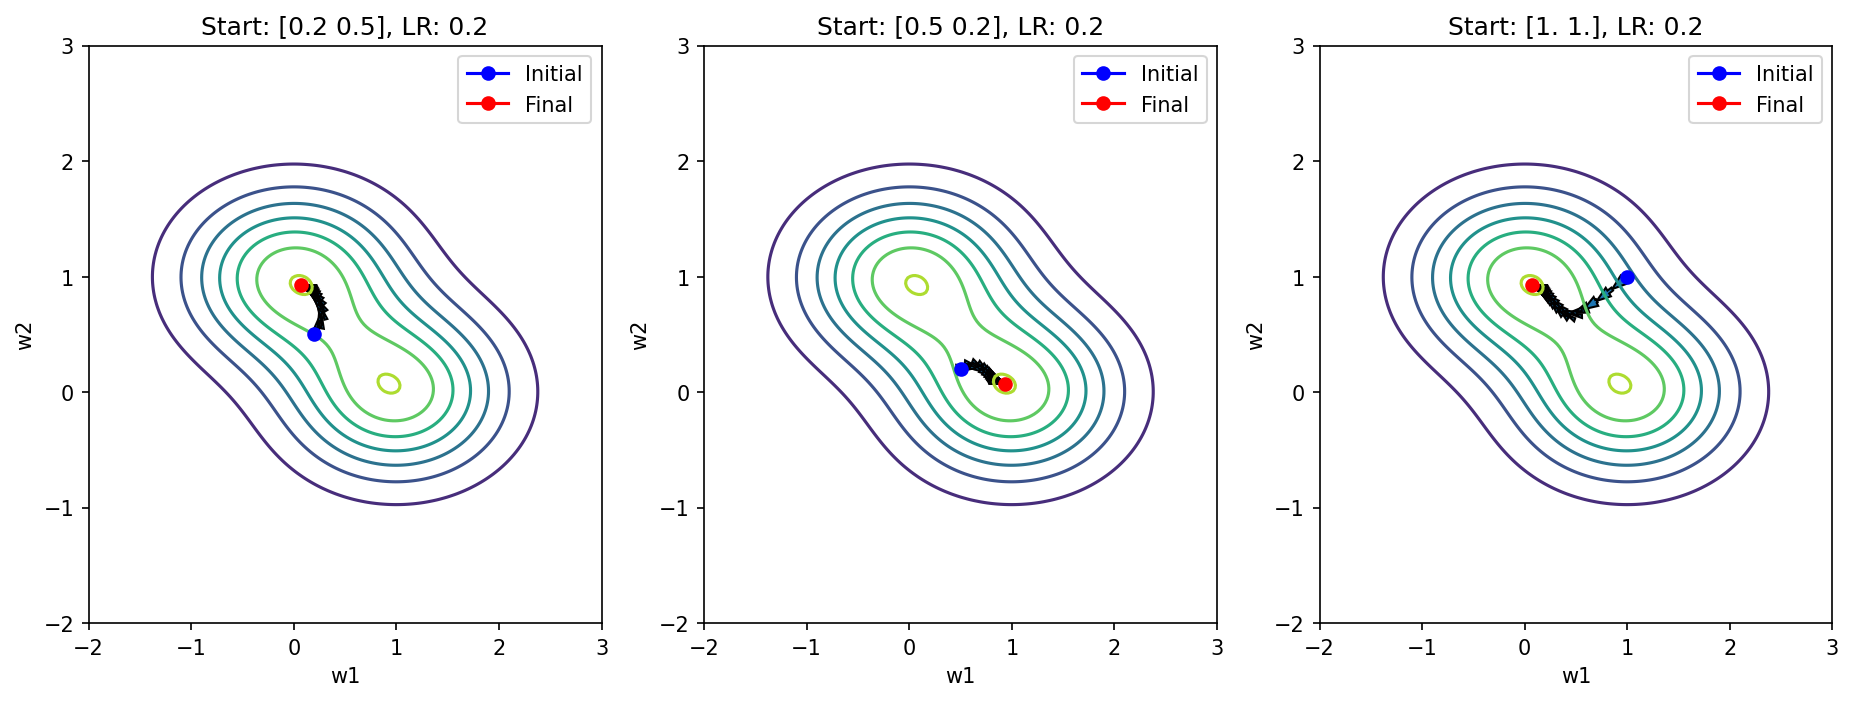

In [ ]:
# Extract trajectories and learning rates for plotting
trajectories = [result[1] for result in best_results]
function_values = [result[2] for result in best_results]
learning_rates = [result[3] for result in best_results]

# Code for plotting.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
for i, trajectory in enumerate(trajectories):
    # Plot contour and trajectory for each starting point
    ax = axes[i]
    ax.contour(W1, W2, Fs)
    ax.plot(trajectory[0, 0], trajectory[0, 1], marker="o", color="blue", label="Initial")
    for j in range(len(trajectory)-1):
        ax.arrow(trajectory[j, 0], trajectory[j, 1],
                trajectory[j+1, 0] - trajectory[j, 0],
                trajectory[j+1, 1] - trajectory[j, 1],
                length_includes_head=True, width=0.03)
    ax.plot(trajectory[-1, 0], trajectory[-1, 1], marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
    ax.set_title(f"Start: {[w1, w2, w3][i]}, LR: {learning_rates[i]}")
plt.show()

#### (e)

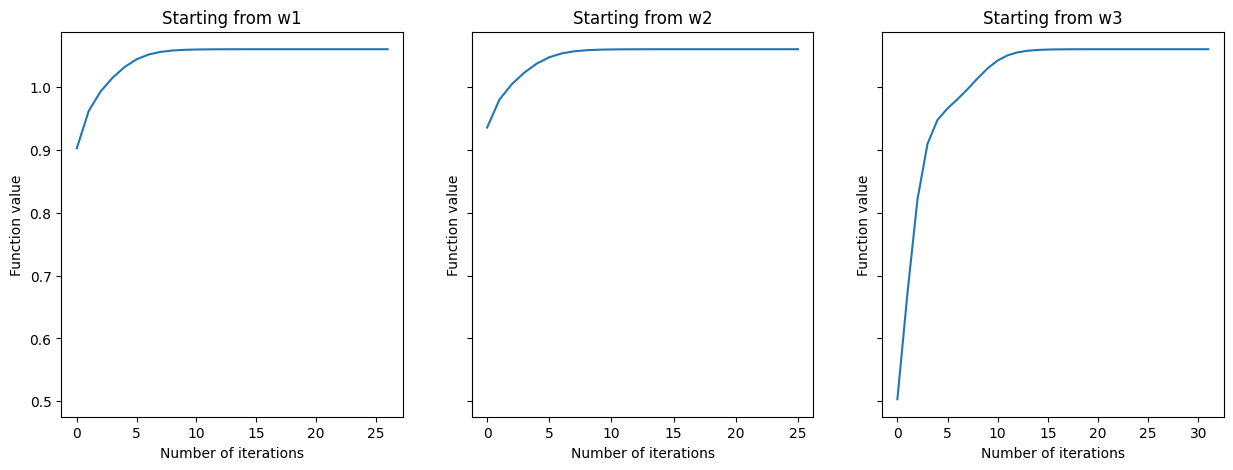

In [ ]:
# Code for plotting.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, f_values in enumerate(function_values):
    axs[i].plot(f_values)
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
    axs[i].set_title(f"Starting from {['w1', 'w2', 'w3'][i]}")
plt.show()

#### (f)

**Discussion on local vs. global maxima:**

From the optimization results, we can observe several important characteristics:

1. The function f(w) has at least two distinct local maxima, as evidenced by the different convergence points from our three starting locations.

2. Starting points w1 = [0.2, 0.5] and w2 = [0.5, 0.2] converged to different local maxima. This demonstrates how gradient-based methods are sensitive to initialization and can get trapped in local optima.

3. From the function value plots, we can see that different starting points achieved different maximum values, suggesting that one of these is the global maximum while others are local maxima.

4. The contour plots clearly show the two "hills" in the function landscape, confirming the presence of multiple local maxima.

5. Gradient ascent, like other local optimization methods, cannot guarantee finding the global optimum unless the function is convex (which this one is not).

This exercise demonstrates why in practice, we often use multiple random initializations when optimizing non-convex functions, to increase the chances of finding the global optimum. It also highlights the limitation of gradient-based methods for non-convex optimization problems, which is relevant to neural network training where the loss landscape typically contains many local optima.